In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [13]:
# Parameter
xname = r"$\omega_\mathrm{cdm}$"
xname_hat = r"$\hat\omega_\mathrm{cdm}$"
xname_true = r"$\omega_\mathrm{cdm, true}$"

# Data 2024_04_07_Wilks_fixed_NP_omega_cdm_0.12011
x_hat = np.array([1.202510e-01 , 1.199819e-01 , 1.201094e-01 , 1.200706e-01 , 1.203961e-01 , 1.202115e-01 , 1.201658e-01 , 1.200921e-01 , 1.199278e-01 , 1.198496e-01 , 1.204964e-01 , 1.201327e-01 , 1.199270e-01 , 1.199470e-01 , 1.201577e-01 , 1.201376e-01 , 1.205630e-01 , 1.201590e-01 , 1.199306e-01 , 1.200834e-01 , 1.202302e-01 , 1.204433e-01 , 1.202584e-01 , 1.200893e-01 , 1.203239e-01 , 1.196996e-01 , 1.200001e-01 , 1.199477e-01 , 1.204979e-01 , 1.201028e-01 , 1.196095e-01 , 1.204793e-01 , 1.197616e-01 , 1.200645e-01 , 1.201018e-01 , 1.200618e-01 , 1.200322e-01 , 1.198147e-01 , 1.201235e-01 , 1.202387e-01 , 1.197776e-01 , 1.203228e-01 , 1.200018e-01 , 1.200868e-01 , 1.203651e-01 , 1.202131e-01 , 1.201267e-01 , 1.197801e-01 , 1.197887e-01 , 1.202458e-01 , 1.199723e-01 , 1.199653e-01 , 1.203160e-01 , 1.199684e-01 , 1.198920e-01 , 1.199835e-01 , 1.198026e-01 , 1.201415e-01 , 1.201991e-01 , 1.196038e-01 , 1.199748e-01 , 1.204113e-01 , 1.203705e-01 , 1.198140e-01 , 1.203935e-01 , 1.199208e-01 , 1.202088e-01 , 1.203264e-01 , 1.199417e-01 , 1.202645e-01 , 1.202790e-01 , 1.202121e-01 , 1.201985e-01 , 1.200294e-01 , 1.199102e-01 , 1.200859e-01 , 1.201219e-01 , 1.198555e-01 , 1.197290e-01 , 1.201897e-01 , 1.203186e-01 , 1.200497e-01 , 1.204410e-01 , 1.200868e-01 , 1.199715e-01 , 1.202318e-01 , 1.198565e-01 , 1.202945e-01 , 1.202082e-01 , 1.197737e-01 , 1.200187e-01 , 1.203305e-01 , 1.205604e-01 , 1.201457e-01 , 1.199727e-01 , 1.203958e-01 , 1.202557e-01 , 1.201268e-01 , 1.203420e-01 , 1.202836e-01 , 1.201905e-01 , 1.200113e-01 , 1.202052e-01 , 1.204051e-01 , 1.196673e-01 , 1.202527e-01 , 1.200662e-01 , 1.202415e-01 , 1.208505e-01 , 1.200748e-01 , 1.200964e-01 , 1.202374e-01 , 1.198055e-01 , 1.198499e-01 , 1.197237e-01 , 1.202082e-01 , 1.196632e-01 , 1.202069e-01 , 1.202843e-01 , 1.201431e-01 , 1.198929e-01 , 1.204902e-01 , 1.205911e-01 , 1.204081e-01 , 1.202153e-01 , 1.201296e-01 , 1.201788e-01 , 1.199693e-01 , 1.200763e-01 , 1.201002e-01 , 1.200157e-01 , 1.199926e-01 , 1.203443e-01 , 1.201992e-01 , 1.202854e-01 , 1.202508e-01 , 1.198937e-01 , 1.200979e-01 , 1.202806e-01 , 1.202979e-01 , 1.201178e-01 , 1.203659e-01 , 1.201088e-01 , 1.200393e-01 , 1.197940e-01 , 1.202172e-01 , 1.197429e-01 , 1.200374e-01 , 1.197958e-01 , 1.202889e-01 , 1.202589e-01 , 1.204321e-01 , 1.201051e-01 , 1.198349e-01 , 1.204081e-01 , 1.201764e-01 , 1.199536e-01 , 1.200685e-01 , 1.198698e-01 , 1.201368e-01 , 1.203319e-01 , 1.201625e-01 , 1.200569e-01 , 1.198583e-01 , 1.202465e-01 , 1.202623e-01 , 1.203146e-01 , 1.202668e-01 , 1.200437e-01 , 1.202194e-01 , 1.200500e-01 , 1.200956e-01 , 1.197890e-01 , 1.197153e-01 , 1.197650e-01 , 1.199234e-01 , 1.195306e-01 , 1.197599e-01 , 1.199987e-01 , 1.202168e-01 , 1.201250e-01 , 1.201677e-01 , 1.199194e-01 , 1.198590e-01 , 1.199311e-01 , 1.199332e-01 , 1.201270e-01 , 1.201462e-01 , 1.198886e-01 , 1.200557e-01 , 1.200866e-01 , 1.198352e-01 , 1.196978e-01 , 1.198970e-01 , 1.202286e-01 , 1.198699e-01 , 1.199312e-01 , 1.201705e-01 , 1.199768e-01 , 1.201729e-01 , 1.197223e-01 , 1.205365e-01 , 1.196998e-01 , 1.200681e-01 , 1.202242e-01 , 1.203068e-01 , 1.202014e-01 , 1.199361e-01 , 1.200243e-01 , 1.200043e-01 , 1.200770e-01 , 1.201162e-01 , 1.201757e-01 , 1.201994e-01 , 1.200115e-01 , 1.197634e-01 , 1.203593e-01 , 1.202320e-01 , 1.201505e-01 , 1.204317e-01 , 1.200361e-01 , 1.201307e-01 , 1.202107e-01 , 1.200990e-01 , 1.201196e-01 , 1.204018e-01 , 1.200438e-01 , 1.201512e-01 , 1.199306e-01 , 1.202820e-01 , 1.202564e-01 , 1.198520e-01 , 1.201293e-01 , 1.197907e-01 , 1.201705e-01 , 1.202206e-01 , 1.204110e-01 , 1.198988e-01 , 1.196168e-01 , 1.199597e-01 , 1.205299e-01 , 1.198643e-01 , 1.201122e-01 , 1.199266e-01 , 1.199734e-01 , 1.197776e-01 , 1.203785e-01 , 1.200383e-01 , 1.203235e-01 , 1.200825e-01])
lnL_hat = -np.array([339.10, 302.89, 284.35, 348.53, 307.69, 298.30, 291.84, 303.40, 301.35, 334.00, 304.19, 331.27, 308.23, 335.71, 311.26, 327.52, 292.70, 282.80, 314.97, 300.48, 318.50, 301.31, 275.25, 324.45, 330.66, 338.23, 306.77, 300.90, 290.54, 301.95, 306.03, 306.41, 301.75, 281.86, 304.83, 300.80, 292.92, 285.21, 310.57, 317.41, 305.93, 321.97, 294.80, 300.38, 304.61, 307.10, 330.55, 311.56, 300.38, 309.72, 305.94, 331.49, 283.17, 284.63, 298.31, 304.55, 287.67, 298.13, 312.20, 313.11, 316.54, 307.04, 328.46, 301.74, 289.15, 309.40, 293.88, 287.40, 307.54, 286.49, 312.72, 295.89, 316.45, 312.90, 307.94, 315.30, 298.32, 289.78, 319.59, 270.76, 305.99, 269.26, 307.50, 293.94, 334.24, 323.23, 310.44, 282.54, 324.33, 299.05, 334.16, 321.18, 300.23, 295.47, 309.26, 297.68, 270.30, 300.57, 318.39, 294.75, 300.86, 296.82, 315.43, 316.80, 305.70, 298.65, 320.58, 337.10, 288.59, 292.40, 287.46, 294.87, 285.98, 306.40, 290.63, 296.18, 313.53, 309.08, 333.15, 290.87, 315.03, 274.56, 331.59, 298.67, 340.82, 298.58, 284.52, 299.91, 302.43, 329.97, 310.96, 294.48, 309.28, 262.81, 316.73, 296.74, 289.48, 286.41, 311.31, 309.39, 304.48, 295.95, 304.04, 282.35, 310.64, 285.77, 291.59, 300.95, 310.27, 355.62, 308.31, 304.78, 291.99, 260.05, 297.02, 301.16, 276.98, 297.49, 271.07, 304.67, 315.05, 308.38, 313.26, 344.65, 296.58, 284.24, 290.73, 310.55, 334.57, 276.46, 317.82, 313.12, 285.17, 271.81, 302.31, 320.91, 319.73, 321.38, 275.73, 329.70, 259.32, 305.97, 317.53, 300.28, 318.25, 290.69, 276.15, 300.77, 291.35, 332.60, 311.08, 325.22, 339.40, 297.52, 319.42, 324.20, 342.65, 298.38, 280.26, 280.34, 340.40, 290.67, 308.79, 326.98, 315.06, 314.13, 297.01, 344.39, 267.40, 302.31, 310.29, 298.30, 308.17, 308.94, 308.53, 344.09, 304.18, 308.51, 300.14, 305.21, 285.44, 279.89, 306.69, 322.39, 315.77, 281.27, 315.31, 313.96, 309.99, 320.17, 300.78, 317.53, 311.99, 291.34, 307.23, 293.54, 299.33, 321.87, 313.48, 311.19, 303.78, 296.82, 314.46, 291.88, 303.53, 298.23, 296.58, 315.64, 296.99, 321.58])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([0.1192, 0.1194, 0.1196, 0.1198, 0.1200, 0.12011, 0.1202, 0.1204, 0.1206, 0.1208, 0.1210])
chi2_asimov = 2*np.array([  8.52,   5.17,   2.66,   0.98,   0.12,    0.00,   0.08,   0.85,   2.42,   4.79,   7.94])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  11.080000000000041


In [14]:
# LR settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# h settings
x_true = 0.12011
x_alt = 0.682
x_lim = 0.001
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [15]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [16]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.12011418022164136
1 sigma:  0.000221826025602688


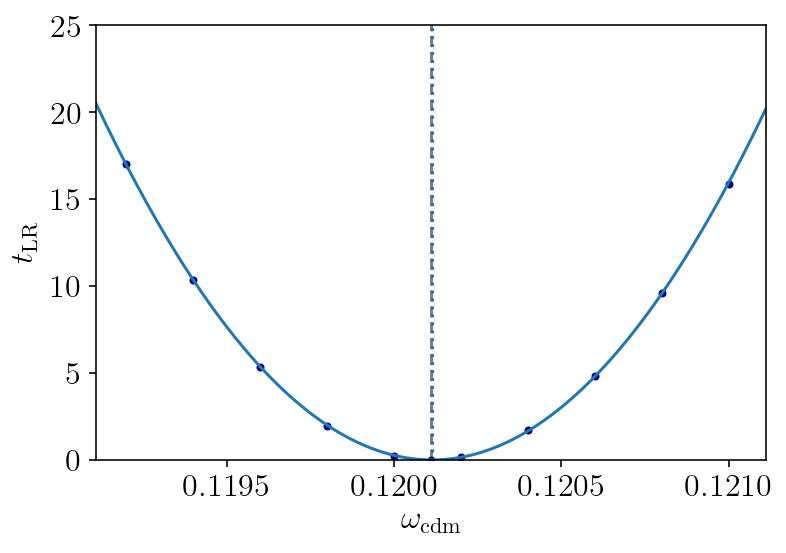

In [18]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,1.0])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Compute intervals
lower_CI_68= c - sigma
upper_CI_68= c + sigma

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])

plt.show()

In [19]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

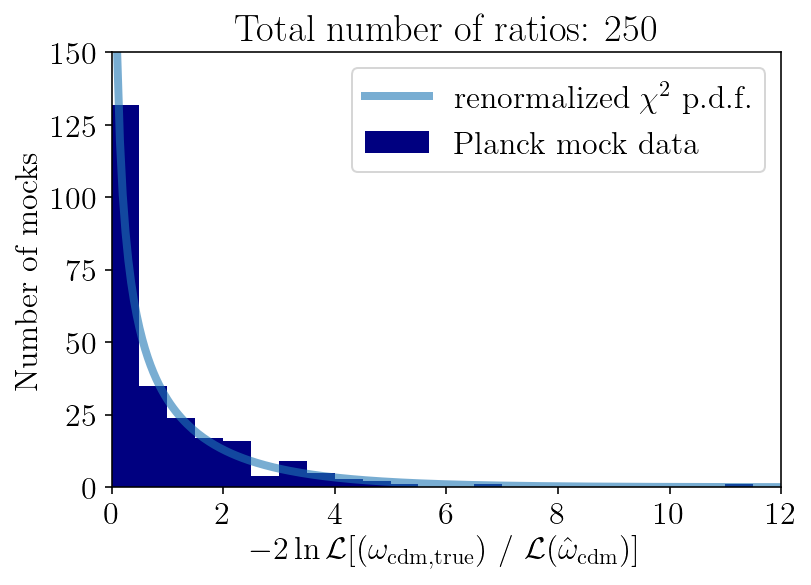

In [20]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

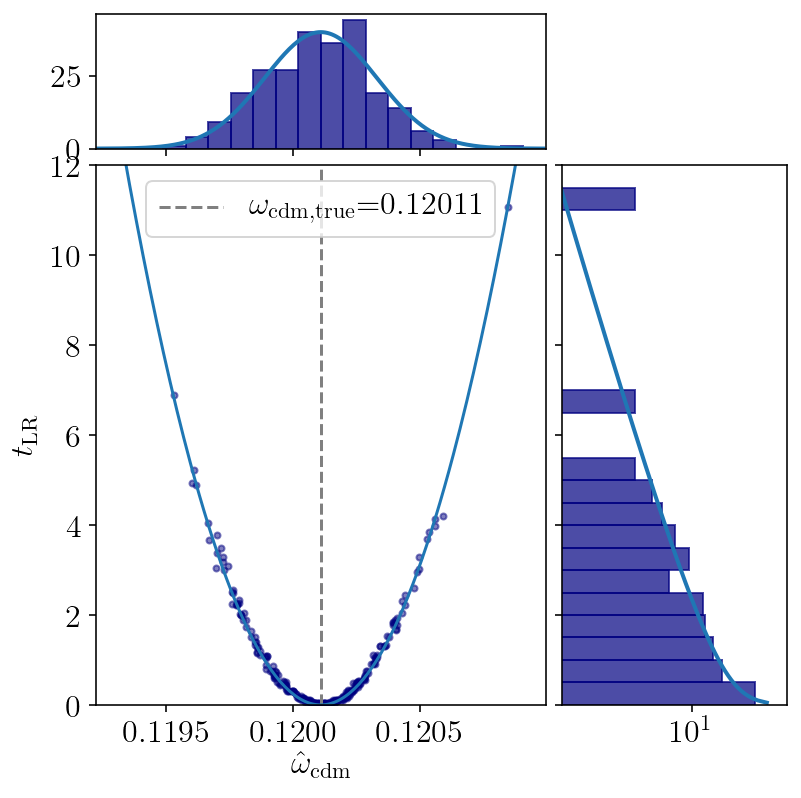

In [21]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="navy", marker=".", alpha=0.5)
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$ = $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
#ax_histy.set_xlim([0,270])
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_omega_cdm.pdf", format="PDF")
plt.show()

In [22]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 1.05
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  1.05


In [23]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.000221826025602688
sigma_mocks:  0.00021555750425758866
